In [1]:
import numpy as np
import scipy.signal as sig
import pywt
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display

In [2]:
data_file = "../data/scooter_example_1.wav"
data, fs = librosa.load(data_file, sr=None)

# crop data
start_time = 95 # seconds
end_time = 100 # seconds
data = data[int(start_time*fs):int(end_time*fs)]

In [3]:
# -------------------------
# Config object
# -------------------------
class PipelineConfig:
    def __init__(self,
                 fs,
                 stft_nfft=16384,
                 overlap=0.5,
                 f0_min=10.0,
                 f0_max=200.0,
                 f0_bins=400,
                 max_harm=12,
                 demon_band=(80, 3000),
                 demon_frame=2.0,
                 demon_hop=0.5):
        self.fs = fs
        self.stft_nfft = stft_nfft
        self.stft_hop =int(stft_nfft * (1 - overlap))
        self.f0_min = f0_min
        self.f0_max = f0_max
        self.f0_bins = f0_bins
        self.max_harm = max_harm
        self.demon_band = demon_band
        self.demon_frame = demon_frame
        self.demon_hop = demon_hop

cfg = PipelineConfig(fs)

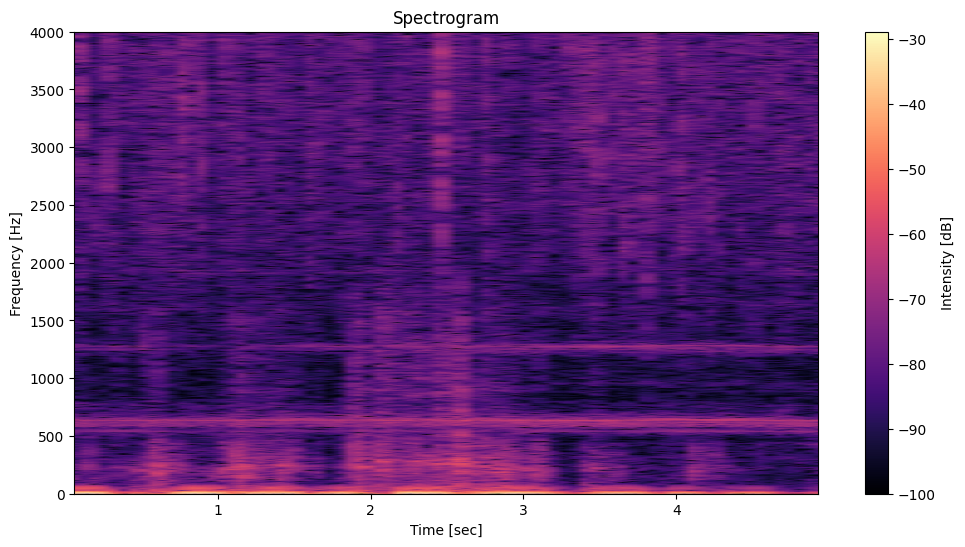

In [4]:
# -------------------------
# Plot Spectrogram
# -------------------------
def plot_spectrogram(data, 
                     fs=cfg.fs, 
                     nfft=cfg.stft_nfft, 
                     hop=cfg.stft_hop, 
                     title="Spectrogram", 
                     color_map='magma', 
                     crop_freq=4000):
    f, t, Sxx = sig.spectrogram(data, fs, nperseg=nfft, noverlap=nfft - hop)
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap=color_map)
    plt.colorbar(label='Intensity [dB]')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(title)
    plt.ylim(0, min(fs / 2, crop_freq))
    plt.show()

plot_spectrogram(data)
